In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Path to the database
cps_path = '../../datasets/Mississipi/'

# Changing the original key names to something we can easily understand
newnames= {'HEFAMINC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
            'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
            'PRCHLD':'PRESENCE_OF_CHILDREN_UNDER_18YO', 'HETS2O':'HOUSEHOLD_PURCHASES_GROCERIES', 
            'HETS6O':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
            'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
            'HETSP3O':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS',
            'HRNUMHOU' : 'TOTAL_PERSONS_HOUSEHOLD','PRNMCHLD':'NUMBER_OWN_CHILDREN'}

In [37]:
# Read 2019 Data:
cps_csvfile = 'CPS_2019Data_MS.csv'
cps2019_df = pd.read_csv(cps_path + cps_csvfile)
cps2019_df = cps2019_df.rename(columns=newnames)

In [50]:
Rz_cps2019_df = cps2019_df[['RACE',
                            'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED',
                            'FOODSTAMPS_AMT_PERMONTH',
                            'HOUSEHOLD_PURCHASES_RESTAURANTS',
                            'HOUSEHOLD_PURCHASES_GROCERIES',
                            'FAMILY_INCOME']]
# Chose number of children with statitistical significance
Rz_cps2019_df = Rz_cps2019_df[Rz_cps2019_df.RACE.isin([0,1,2,3,4])]
# Households needing to meet food needs
Rz_cps2019_df = Rz_cps2019_df[Rz_cps2019_df['AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED']!=-1]

Rz_cps2019_df = Rz_cps2019_df[Rz_cps2019_df['FOODSTAMPS_AMT_PERMONTH']>0]

In [51]:
Rz_cps2019_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 65 to 2519
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   RACE                                       92 non-null     int64
 1   AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED  92 non-null     int64
 2   FOODSTAMPS_AMT_PERMONTH                    92 non-null     int64
 3   HOUSEHOLD_PURCHASES_RESTAURANTS            92 non-null     int64
 4   HOUSEHOLD_PURCHASES_GROCERIES              92 non-null     int64
 5   FAMILY_INCOME                              92 non-null     int64
dtypes: int64(6)
memory usage: 5.0 KB


In [52]:
Ch_cps2019_df = cps2019_df[cps2019_df.NUMBER_OWN_CHILDREN.isin([0,1,2,3])]

AssertionError: 1

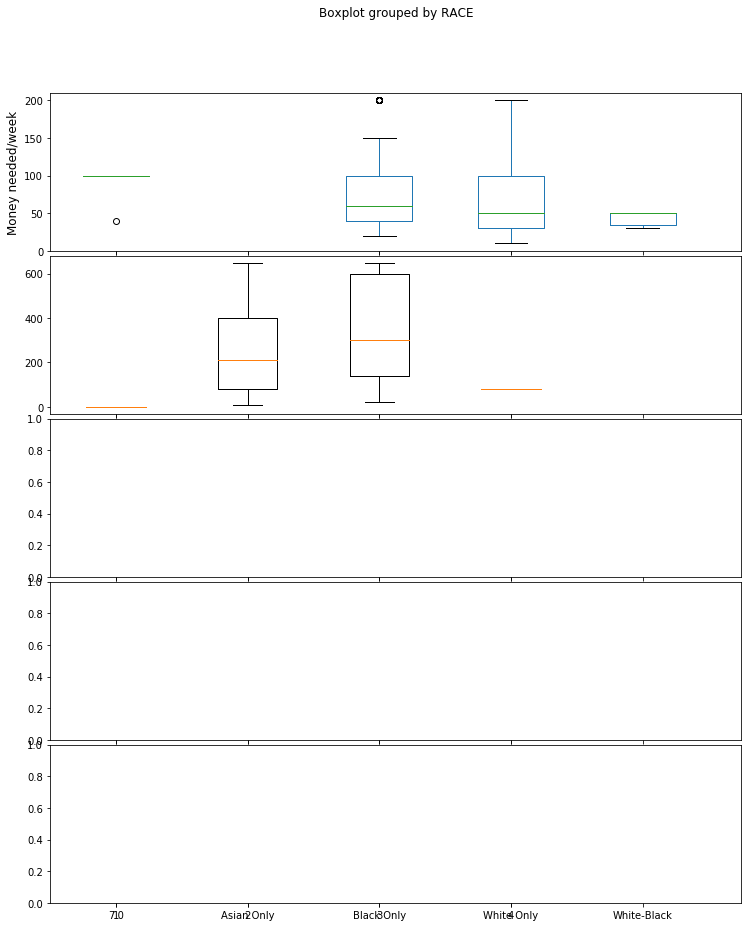

In [25]:
Dict_Race = {1: 'White Only',
             2: 'Black Only',
             4: 'Asian Only',
             6: 'White-Black'}

def fix_race(df, string):
    for i in [1,2,4,6]:
        if i not in df.RACE.drop_duplicates().values:
            df = df.append({'RACE': i,
                             string: 0}, 
                             ignore_index = True)
    df = df.replace({"RACE": Dict_Race})    
    return df
# Households needing to meet food needs
FoodNeed = cps2019_df[cps2019_df['AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED']!=-1]
FoodNeed = fix_race(FoodNeed, 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED')
# Food stamps/month:
FoodStamps = cps2019_df[cps2019_df['FOODSTAMPS_AMT_PERMONTH']>0]
FoodStamps = fix_race(FoodStamps, 'FOODSTAMPS_AMT_PERMONTH')
# Purchases in Restaurants /week
FoodRest = cps2019_df[cps2019_df['HOUSEHOLD_PURCHASES_RESTAURANTS']>=0]
FoodRest = fix_race(FoodRest, 'HOUSEHOLD_PURCHASES_RESTAURANTS')
# Purchases in Groceries / week
FoodGroc = cps2019_df[cps2019_df['HOUSEHOLD_PURCHASES_GROCERIES']>=0]
FoodGroc = fix_race(FoodGroc, 'HOUSEHOLD_PURCHASES_GROCERIES')
# Family Income
FamInc = cps2019_df[cps2019_df['AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED']!=-1]
Dict_Family_Income = { 1: 2500, 2: 6250, 3: 8750, 4: 11250, 5: 13750, 6: 17500,
                       7: 22500, 8: 27500, 9: 32500, 10: 37500, 11: 45000, 12: 55000,
                      13: 67500, 14: 87500, 15: 125000, 16: 150000}
FamInc = FamInc.replace({"FAMILY_INCOME": Dict_Family_Income})
FamInc = fix_race(FamInc, 'FAMILY_INCOME')

# MAKE THE PLOT
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, figsize=(12,15))
fig.subplots_adjust(0,0,1,1,0,0.03) # This removes space between plots

FoodNeed.boxplot(column='AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED',
                 by='RACE',grid=False, ax=ax1)
ax1.set_ylabel('Money needed/week', fontsize=12)
ax1.set_title('')
ax1.set_ylim(0,210)
# Food stamps/month:
FoodStamps.boxplot(column='FOODSTAMPS_AMT_PERMONTH',
                 by='RACE',grid=False, ax=ax2)
ax2.set_ylabel('Food stamps/month', fontsize=12)
ax2.set_title('')
ax2.set_ylim(0,700)
# Purchase Restaurants
FoodRest.boxplot(column='HOUSEHOLD_PURCHASES_RESTAURANTS',
                 by='RACE',grid=False,ax=ax3)
ax3.set_ylabel('Money Restaurants/week', fontsize=12)
ax3.set_title('')
ax3.set_ylim(0,305)
# Purchases in Groceries / week
FoodGroc.boxplot(column='HOUSEHOLD_PURCHASES_GROCERIES',
                 by='RACE',grid=False,ax=ax4)
ax4.set_ylabel('Money Groceries/week', fontsize=12)
ax4.set_title('')
ax4.set_ylim(0,450)
# Family Income
FamInc.boxplot(column='FAMILY_INCOME',
                 by='RACE',grid=False, ax=ax5)
ax5.set_ylabel('Family Income/year', fontsize=12)
ax5.set_title('')
ax5.set_ylim(0,160000)
ax5.set_xlabel('Race')
ax5.tick_params(axis='x', labelrotation = 90)

fig.suptitle('2019',y=0.93, fontsize=30)
plt.show()